# Predicting Tesla's(TSLA) Stock

## Import Utilization Tools
Run cell before starting any code

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.transforms as mtransforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv("TSLA-2.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,6/30/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,7/1/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,7/2/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,7/6/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# Introduction
Tesla is one of the largest well known companies in the United States. Not just for what they produce for consumers, but why it is made, how they are made, who runs it, and how much their stock can be affected by something like a tweet. That is why I felt it would be interesting to try to make predictive modeling visuals of a company that can actually be hard to predict because the CEO Elon Musk felt like tweeting something crazy because he was board, or felt like revealing something new and exciting about the direction his company is going.


# Dataset

This dataset is sourced from [ Tesla Stock Data 2010 - 2024 ](https://www.kaggle.com/datasets/iamtanmayshukla/tesla-stocks-dataset)<br>
Which provides a pretty simple overview of Tesla:<br>
- <font color=blue>Date</font>
- <font color=red>Open(Opening price of the stock)</font>
- <font color=green>High(Highest price of the stock for the day)</font>
- <font color=pink>Low(Lowest price of the stock for the day)</font>
- <font color=orange>Close(Closing price of the stock)</font>
- <font color=grey>Adj Close(Adjusted closing price)</font>
- <font color=black>Volume(Number of shares traded)</font><br>
<br>



### Data Cleanup
(Looking for missing code)<br>
(How many rows/columns)<br>
(Summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values)<br>

In [61]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
df.shape

Series([], dtype: int64)


,Date,Open,High,Low,Close,Adj Close,Volume
count,3562,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3.562000e+03
mean,2017-07-25 01:32:34.632229120,76.144584,77.814867,74.365471,76.126834,76.126834,9.689694e+07
min,2010-06-29 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,2014-01-10 18:00:00,11.653167,11.956167,11.328833,11.680500,11.680500,4.793858e+07
50%,2017-07-25 12:00:00,17.493334,17.713000,17.205334,17.474667,17.474667,8.242725e+07
75%,2021-02-07 06:00:00,165.437496,169.744996,161.365005,166.289173,166.289173,1.226422e+08
max,2024-08-22 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08
std,NaN,102.704572,104.986967,100.219504,102.631107,102.631107,7.849683e+07


## Describing our Data
First a general overview of the data and then a scatter pairplot comparing our Adj Close to:<br>
- Open
- High
- Low
- Volume

In [63]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3562,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3.562000e+03
mean,2017-07-25 01:32:34.632229120,76.144584,77.814867,74.365471,76.126834,76.126834,9.689694e+07
min,2010-06-29 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,2014-01-10 18:00:00,11.653167,11.956167,11.328833,11.680500,11.680500,4.793858e+07
50%,2017-07-25 12:00:00,17.493334,17.713000,17.205334,17.474667,17.474667,8.242725e+07
75%,2021-02-07 06:00:00,165.437496,169.744996,161.365005,166.289173,166.289173,1.226422e+08
max,2024-08-22 00:00:00,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08
std,NaN,102.704572,104.986967,100.219504,102.631107,102.631107,7.849683e+07


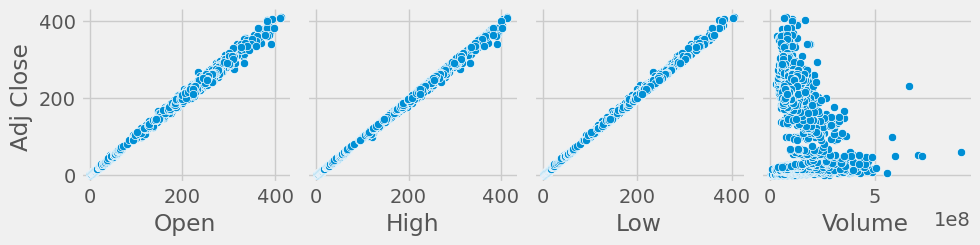

In [64]:
sns.pairplot(df, kind='scatter', y_vars='Adj Close', x_vars=['Open','High','Low','Volume'], diag_kind='auto', markers=None, height=2.5)